In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
sys.path.append('../')
import model
import cost
from scipy.integrate import solve_ivp

In [14]:
x_t = np.zeros(3)
x_t[0] = 0.0
x_t[1] = 2.0
x_t[2] = 0.0
ix = 3
iu = 2
N = 500
delT = 0.1
myModel = model.unicycle('Hello',ix,iu,delT)
myCost = cost.unicycle('Hello',x_t,N)

In [15]:
x0 = np.zeros(3)
x0[0] = -1.0 # -2.0
x0[1] = 0.0 # -0.5
x0[2] = np.pi/2

u0 = np.ones((N,iu))

In [16]:
from Scvx import Scvx

In [17]:
i1 = Scvx('unicycle',N,maxIter,myModel,myCost)
x, u = i1.update(x0,u0)

iteration   cost        reduction
0           949.958     462         
1           488.007     339         
2           149.059     88.8        
3           60.2483     34.2        
4           26.074      5.41        
5           20.6644     1.91        
6           18.7561     1.3         
7           17.4528     1.34        
8           16.1174     1.44        
9           14.6759     1.78        
10          12.8942     1.3         
11          11.5954     2.22        
12          9.376       0.179       
13          9.19712     0.000265    
14          9.19685     2.07e-06    
15          9.19685     4.65e-08    
SUCCEESS: cost change < tolFun 4.653590224279469e-08


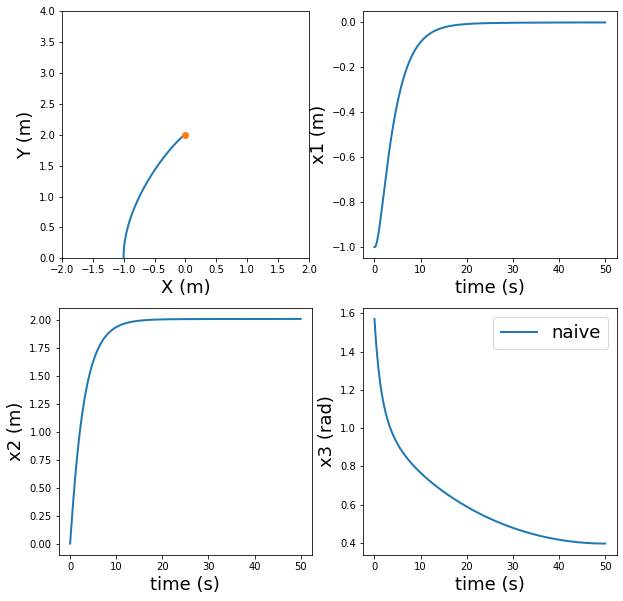

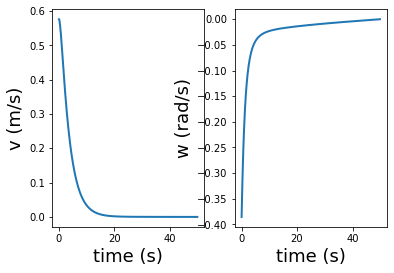

In [18]:
plt.figure(figsize=(10,10))
fS = 18
plt.subplot(221)
plt.plot(x[:,0], x[:,1], linewidth=2.0)
plt.plot(x_t[0],x_t[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-2, 2, 0, 4.0])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)
plt.subplot(222)
plt.plot(np.array(range(N+1))*0.1, x[:,0], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x1 (m)', fontsize = fS)
plt.subplot(223)
plt.plot(np.array(range(N+1))*0.1, x[:,1], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x2 (m)', fontsize = fS)
plt.subplot(224)
plt.plot(np.array(range(N+1))*0.1, x[:,2], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x3 (rad)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()

plt.figure()
plt.subplot(121)
plt.plot(np.array(range(N))*0.1, u[:,0], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('v (m/s)', fontsize = fS)
plt.subplot(122)
plt.plot(np.array(range(N))*0.1, u[:,1], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('w (rad/s)', fontsize = fS)
plt.show()